In [1]:
import joblib
import pandas as pd
import shap
import matplotlib.pyplot as plt

model = joblib.load("../models/fraud_model.pkl")

X_test = joblib.load("../data/X_test.pkl")
y_test = joblib.load("../data/y_test.pkl")
features_names = joblib.load("../data/features_names.pkl")
X_test_df = pd.DataFrame(X_test, columns=features_names)

print("Model and test data loaded successfully")

Model and test data loaded successfully


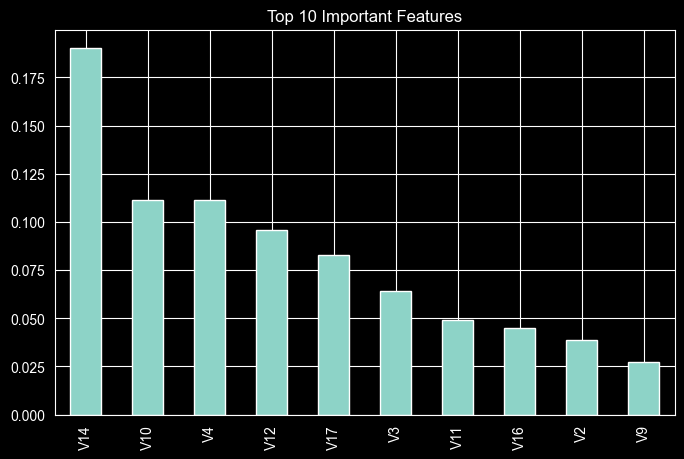

In [2]:
feature_importances = pd.Series(
    model.feature_importances_,
    index=X_test_df.columns
).sort_values(ascending=False)


print("Top 10 Important Features:")
print(feature_importances.head(10))

plt.figure(figsize=(8,5))
feature_importances.head(10).plot(kind='bar')
plt.title("Top 10 Important Features")
plt.show()

In [3]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [ ]:
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

In [ ]:
fraud_index = y_test[y_test==1].index[0]
shap.force_plot(
    explainer.expected_value[1],
    shap_values[1][0],
    X_test.iloc[0]
)